In [40]:
#import necssary libraries

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns

In [46]:
#load csv into a dataframe
df = pd.read_csv('income.csv')

In [49]:
#drop unnecessary columns
df.drop('Name',axis='columns',inplace=True)

In [50]:
#normalize the data for better clustering

scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436
5,0.764706,0.940171
6,0.882353,0.982906
7,0.705882,1.000000
8,0.588235,0.948718
9,0.529412,0.726496


In [51]:
#finding the best k-value for our number of clusters

k_range = range(1,10)
sse = []

for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Elbow Plot'}, xlabel='K', ylabel='Sum of squared error'>

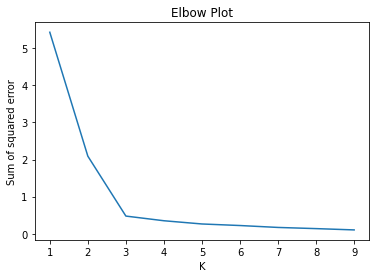

In [52]:
#visualizing the elbow plot to determine best k-value

plt.title('Elbow Plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
sns.lineplot(k_range,sse)

In [53]:
#cluster the data into three groups (0,1,2)

km = KMeans(n_clusters=3)
df['clusters'] = km.fit_predict(df)
df

,Age,Income($),clusters
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,0
5,0.764706,0.940171,0
6,0.882353,0.982906,0
7,0.705882,1.000000,0
8,0.588235,0.948718,0
9,0.529412,0.726496,0


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Income'>

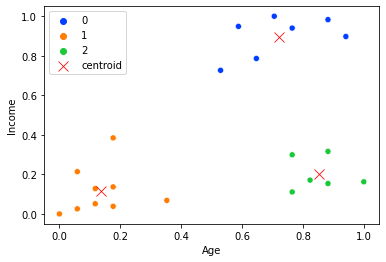

In [68]:
#plot the outcome of clustering

plt.xlabel('Age')
plt.ylabel('Income')
sns.scatterplot(df['Age'],df['Income($)'],hue=df['clusters'],palette='bright')
sns.scatterplot(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='red',marker='x',s=100,label='centroid')
